In [ ]:
pip install qiskit

In [ ]:
pip install qiskit_aer

## Sistemas compuestos

Ejemplos básicos de sistemas compuestos (2 qubits) en Qiskit.
1. Estado separable sencillo.
2. Estado separable en superposición.
3. Estado entrelazado (Bell State).


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [ ]:
def example_1_separable_state():
    """
    Ejemplo 1: Estado separable sencillo de 2 qubits.
    - Comenzamos en |00>.
    - Aplicamos X en el segundo qubit -> estado |01>.
    - Verificamos el estadovector y la medición.
    """
    print("=== Ejemplo 1: Estado separable sencillo ===")

    # Creamos un circuito de 2 qubits
    qc = QuantumCircuit(2)

    # Aplicamos X al qubit 1 (recordar que Qiskit indexa 0 al primero y 1 al segundo)
    qc.x(1)

    # Obtenemos el estado final sin medición usando 'Statevector'
    sv_final = Statevector.from_label("00").evolve(qc)
    print("Vector de estado final (antes de medir):", sv_final)

    # Para obtener las probabilidades de medición en la base computacional
    qc_m = qc.copy()
    qc_m.measure_all()

    # Imprimir circuito cuantico en pantalla.
    print("\nCircuito cuantico:")
    print(qc_m.draw())

    simulator = AerSimulator()
    qc_m_t = transpile(qc_m, simulator)
    shots = 1024
    result = simulator.run(qc_m_t, shots=shots).result()
    counts = result.get_counts(qc_m_t)

    print("Resultados de medición (counts):", counts)
    print("Observamos que, con alta probabilidad, obtenemos '01' (estado separable).\n")

    counts_1 = counts

    return counts_1

In [ ]:
def example_2_superposition_state():
    """
    Ejemplo 2: Dos qubits en un estado separable, pero cada uno en superposición.
    - Primer qubit: H -> (|0> + |1>) / sqrt(2)
    - Segundo qubit: H -> (|0> + |1>) / sqrt(2)
    - El estado global es (|0> + |1>) (|0> + |1>) / 2 = (|00> + |01> + |10> + |11>)/2
      que está separable, aunque con 4 componentes no entrelazadas.
    """
    print("=== Ejemplo 2: Dos qubits en superposición separable ===")

    qc = QuantumCircuit(2)
    qc.h(0)  # Hadamard en qubit 0
    qc.h(1)  # Hadamard en qubit 1

    # Obtenemos el estado final sin medición
    sv_final = Statevector.from_label("00").evolve(qc)
    print("Vector de estado final (antes de medir):", sv_final)

    # Medimos para ver la distribución de probabilidad (debería ser uniforme)
    qc_m = qc.copy()
    qc_m.measure_all()

    # Imprimir circuito cuantico en pantalla.
    print("\nCircuito cuantico:")
    print(qc_m.draw())

    simulator = AerSimulator()
    qc_m_t = transpile(qc_m, simulator)
    shots = 1024
    result = simulator.run(qc_m_t, shots=shots).result()
    counts = result.get_counts(qc_m_t)

    print("Resultados de medición (counts):", counts)
    print("Se espera que '00', '01', '10' y '11' aparezcan de manera casi uniforme.\n")

    counts_2 = counts

    return counts_2

In [ ]:
def example_3_entangled_state():
    """
    Ejemplo 3: Estado entrelazado (Bell State).
    - Crearemos el estado (|00> + |11>) / sqrt(2) usando:
      1) H en el qubit 0 -> (|0> + |1>)/sqrt(2) en el qubit 0, qubit 1 sigue en |0>.
      2) CNOT( qubit0 -> qubit1 ) -> Se consigue el estado de Bell: (|00> + |11>)/sqrt(2).
    - Este estado NO es separable (está entrelazado).
    """
    print("=== Ejemplo 3: Estado entrelazado (Bell State) ===")

    qc = QuantumCircuit(2)
    qc.h(0)        # H en qubit 0
    qc.cx(0, 1)    # CNOT: control=0, target=1

    # Obtenemos el estado final sin medición
    sv_final = Statevector.from_label("00").evolve(qc)
    print("Vector de estado final (antes de medir):", sv_final)

    # Medición para ver que sale 00 o 11 con igual probabilidad
    qc_m = qc.copy()
    qc_m.measure_all()

    # Imprimir circuito cuantico en pantalla.
    print("\nCircuito cuantico:")
    print(qc_m.draw())

    simulator = AerSimulator()
    qc_m_t = transpile(qc_m, simulator)
    shots = 1024
    result = simulator.run(qc_m_t, shots=shots).result()
    counts = result.get_counts(qc_m_t)

    print("Resultados de medición (counts):", counts)
    print("El estado está entrelazado, por lo que obtendremos (caso ideal): '00' y '11'.\n")

    counts_3 = counts

    return counts_3

=== Ejemplo 1: Estado separable sencillo ===
Vector de estado final (antes de medir): Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))

Circuito cuantico:
              ░ ┌─┐   
   q_0: ──────░─┤M├───
        ┌───┐ ░ └╥┘┌─┐
   q_1: ┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
meas: 2/═════════╩══╩═
                 0  1 
Resultados de medición (counts): {'10': 1024}
Observamos que, con alta probabilidad, obtenemos '01' (estado separable).



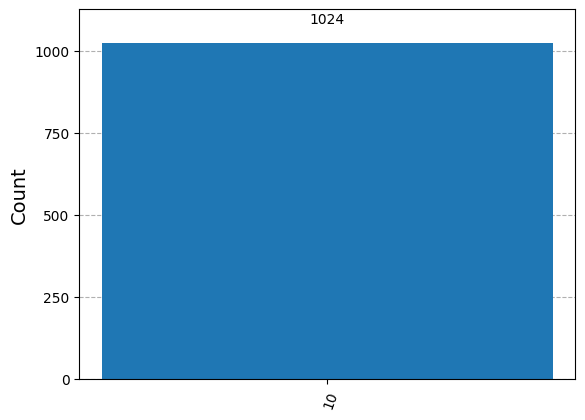

In [ ]:
counts_1 = example_1_separable_state()
# Imprimir histograma de resultados
plot_histogram(counts_1)

=== Ejemplo 2: Dos qubits en superposición separable ===
Vector de estado final (antes de medir): Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))

Circuito cuantico:
        ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─░─┤M├───
        ├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
meas: 2/═════════╩══╩═
                 0  1 
Resultados de medición (counts): {'01': 257, '00': 261, '10': 254, '11': 252}
Se espera que '00', '01', '10' y '11' aparezcan de manera casi uniforme.



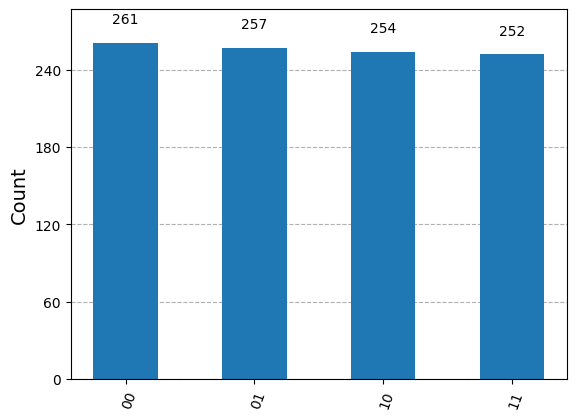

In [ ]:
counts_2 = example_2_superposition_state()
# Imprimir histograma de resultados
plot_histogram(counts_2)

=== Ejemplo 3: Estado entrelazado (Bell State) ===
Vector de estado final (antes de medir): Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

Circuito cuantico:
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
Resultados de medición (counts): {'11': 519, '00': 505}
El estado está entrelazado, por lo que obtendremos (caso ideal): '00' y '11'.



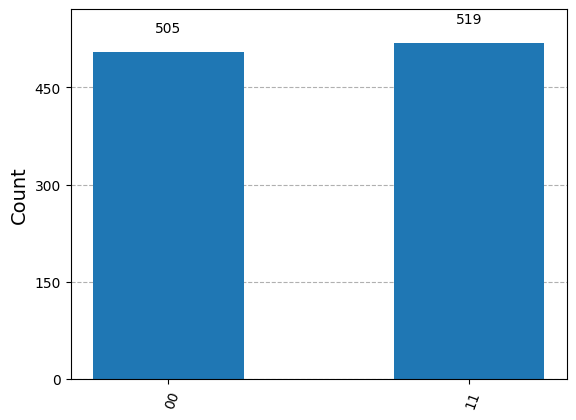

In [ ]:
counts_3 = example_3_entangled_state()
# Imprimir histograma de resultados
plot_histogram(counts_3)